# Bayes classifier-Unimodal Gaussian density 

## Full covariance matrix for all the classes and is same for all the classes 

1. Same covariance matrix for all the classes may be obtained by taking 
a verage of covariance matrices of all the classes 
2. Same covariance matrix for all the classes by computing the 
covariance matrix of training data of all the classes combined. 

In [4]:
import numpy as np

def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # First two columns are features
    y = data[:, -1]   # Last column is the class label
    return X, y

def compute_class_covariance(X, y, class_label):
    X_class = X[y == class_label]  # Get data for the given class
    return np.cov(X_class.T)  # Compute covariance matrix for the class

def compute_shared_covariance_matrix(X, y, num_classes):
    covariances = []
    for class_label in range(num_classes):
        cov_matrix = compute_class_covariance(X, y, class_label)
        covariances.append(cov_matrix)
    
    # Average covariance matrix
    return np.mean(covariances, axis=0)

# Load the training data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')

# Assuming two classes (0 and 1)
num_classes = 2
shared_cov_matrix_avg = compute_shared_covariance_matrix(X_train, y_train, num_classes)

print("Shared Covariance Matrix (Averaged across classes):")
print(shared_cov_matrix_avg)
def compute_combined_covariance_matrix(X):
    return np.cov(X.T)  # Compute covariance matrix of all data combined

# Compute the combined covariance matrix
shared_cov_matrix_combined = compute_combined_covariance_matrix(X_train)

print("Shared Covariance Matrix (Combined data):")
print(shared_cov_matrix_combined)


Shared Covariance Matrix (Averaged across classes):
[[nan nan]
 [nan nan]]
Shared Covariance Matrix (Combined data):
[[ 1.13570517 -0.04216481]
 [-0.04216481  1.04341984]]


C:\Users\raksh\AppData\Local\Temp\ipykernel_8388\3837758916.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(X_class.T)  # Compute covariance matrix for the class


#### Decision region plot for all the classes together with the training data superposed 

c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\raksh\AppData\Local\Temp\ipykernel_8388\3837758916.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(X_class.T)  # Compute covariance matrix for the class
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


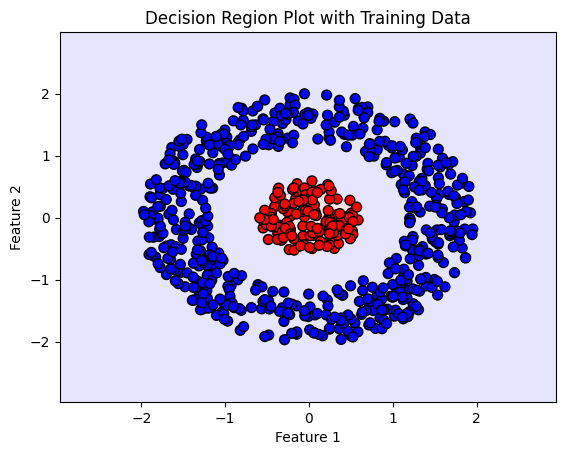

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # First two columns are features
    y = data[:, -1]   # Last column is the class label
    return X, y

def plot_decision_region(X, y, model, resolution=0.02):
    # Set up grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the contour plot for decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=ListedColormap(["#FF0000", "#0000FF"]))
    plt.title("Decision Region Plot with Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Load training data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')

# Initialize the classifier
nb_classifier = GaussianNB()

# Compute the shared covariance matrix (by averaging covariance matrices)
shared_cov_matrix_avg = compute_shared_covariance_matrix(X_train, y_train, 2)

# Train the Naive Bayes classifier with the shared covariance matrix
nb_classifier.set_params(var_smoothing=1e-9)  # Small smoothing to avoid divide by zero
nb_classifier.fit(X_train, y_train)

# Plot decision region with training data
plot_decision_region(X_train, y_train, nb_classifier)


#### Decision region plot for all the classes together with the testing data superimposed